# Sprint 機械学習スクラッチ　クラスタリング

**Sprintの目的**
- スクラッチを通してK-meansを理解する
- クラスタ分析を行う

**どのように学ぶか**

スクラッチでK-meansを実装した後、それを使用しクラスタ分析を行います。

## 1.K-meansスクラッチ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sb

**シンプルデータセット3の準備**

In [2]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X.shape

(100, 2)

In [3]:
data = pd.DataFrame(X, columns=['X1', 'X2'])
data.head()

,X1,X2
0,0.720868,3.713471
1,-1.894684,7.968985
2,1.356789,4.364625
3,1.053744,4.492869
4,1.591415,4.904977


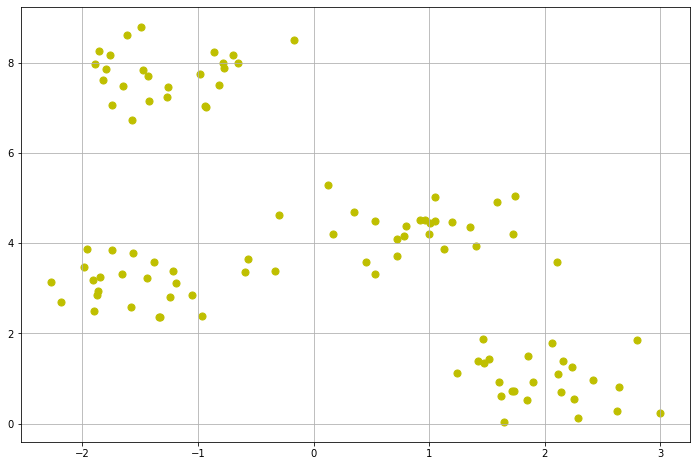

In [4]:
# データの可視化

plt.figure(figsize =(12, 8))
plt.scatter(X[:,0], X[:,1], c='y', marker='o', s=50)
plt.grid()

## 【問題1】中心点の初期値を決める
入力されたデータから K 個の中心点μ1 から μK の初期値を決めるコードを作成してください。
K は指定したクラスタ数です。
最もシンプルな初期値の決定方法は、データ点 Xn の中からランダムに K 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 μ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [5]:
def init_centroids(X, k):
    """
    中心点の初期値を決める関数
    """
    m, n = X.shape # (n_samples, n_features)
    centroids = np.zeros((k, n)) # (k, n_features)
    idx = np.random.randint(0, m, k)
#     print('idx', idx)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [6]:
initial_centroids = init_centroids(X, 4)
print('initial_centroids:', initial_centroids, sep='\n')

initial_centroids:
[[ 1.60161834  0.92363636]
 [ 2.28809874  0.12954182]
 [ 2.4198128   0.96215512]
 [-1.74836345  7.06307447]]


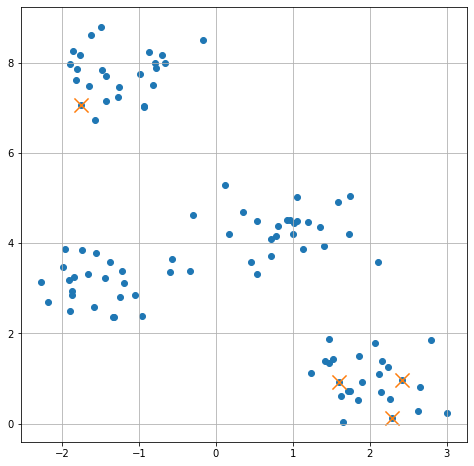

In [7]:
# この時の中心点を可視化

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='x', 
            s=200, edgecolors='r')
plt.grid()

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

In [8]:
def compute_sse(X, centroids):
    """
    SSEを求める関数
    """
    m = X.shape[0]
    k = centroids.shape[0]
    sse = 0
  
    for i in range(m):
        dist_list = []
        for j in range(k):
            # 中心点毎に一番短い距離を保持
            dist_list.append(np.sum(((X[i,:] - centroids[j,:]) ** 2)))
            min_dist = min(dist_list)

        # 合計値を更新
        sse += np.sum(min_dist)

    return sse

In [9]:
compute_sse(X, centroids=initial_centroids)

630.6146906495103

## 【問題3】クラスタへの割り当て
全てのデータ点 Xn を最も近い中心点 μk に割り当てるコードを作成してください。

In [10]:
def find_closest_centroids(X, centroids):
    """
    全てのデータ点を最も近い中心点に割り当てる関数
    """
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        # ループ毎にリセット
        min_dist = 1000000
        for j in range(k):
            # データ点とすべての中心点との距離を保持
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            # データ点毎に最も近い中心点のラベルを保存
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [11]:
find_closest_centroids(X, initial_centroids)

array([0., 3., 0., 0., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 0.,
       0., 0., 1., 2., 3., 3., 1., 3., 0., 0., 0., 2., 2., 0., 3., 2., 2.,
       3., 0., 3., 0., 3., 0., 3., 0., 3., 3., 0., 3., 0., 3., 0., 0., 3.,
       0., 0., 3., 0., 3., 3., 2., 2., 3., 3., 0., 2., 3., 0., 3., 0., 0.,
       2., 0., 3., 0., 0., 3., 0., 0., 0., 3., 1., 0., 1., 3., 3., 3., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 3.])

## 【問題4】中心点の移動
中心点 μk を k 番目のクラスタに割り当てられる全てのデータ点 Xn の平均値（重心）に移動するコードを作成してください。

In [12]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        # 中心点のラベルに該当するデータ点のインデックスを保存
        indices = np.where(idx == i)
        # 新しい中心点（重心）を求める
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0]))
    
    return centroids

In [13]:
idx = find_closest_centroids(X, initial_centroids)

centroids = compute_centroids(X, idx=idx, k=4)
centroids

array([[ 0.36586962,  2.84772077],
       [ 2.36300844,  0.24467153],
       [ 2.29900984,  1.49055922],
       [-1.02288465,  6.21378192]])

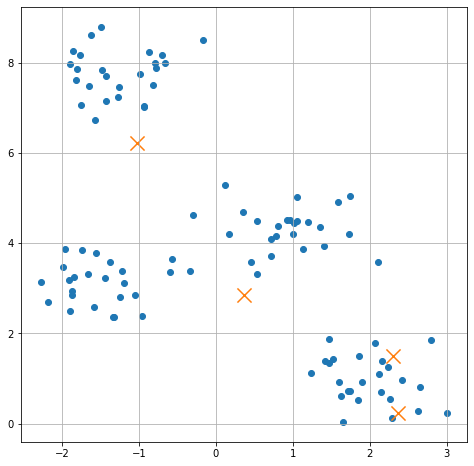

In [14]:
# この時の中心点を可視化

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', 
            s=200, edgecolors='r')
plt.grid()

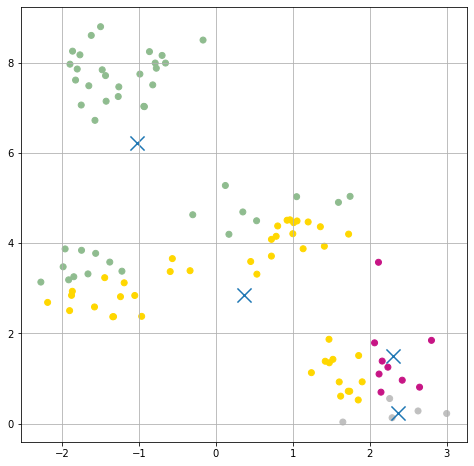

In [15]:
plt.figure(figsize=(8, 8))
colors = ['gold', 'silver', 'mediumvioletred', 'darkseagreen']
cmap = ListedColormap(colors)

plt.scatter(X[:, 0], X[:, 1], c=idx, cmap=cmap, marker='o')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', 
            s=200, edgecolors='black')

plt.grid()

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 μk と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

In [16]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    sse = 0
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids, sse

In [17]:
idx, centroids, sse = run_k_means(X, initial_centroids, 10)
print('idx', idx)
print('centroids', centroids)

idx [0. 3. 0. 0. 0. 0. 0. 3. 0. 3. 3. 3. 3. 3. 3. 1. 2. 0. 0. 1. 2. 3. 0. 1.
 0. 0. 0. 0. 2. 1. 1. 3. 1. 2. 0. 0. 3. 2. 3. 0. 0. 0. 3. 0. 0. 3. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 3. 3. 1. 2. 3. 3. 2. 1. 0. 2. 3. 0. 0. 2. 0. 3. 2.
 0. 3. 0. 0. 0. 0. 1. 2. 1. 3. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 3.
 3. 0. 3. 0.]
centroids [[-0.3255195   3.72390954]
 [ 2.10458645  0.61362557]
 [ 1.84900694  1.68295352]
 [-1.26811733  7.76378266]]


In [18]:
best_see = compute_sse(X, centroids=centroids)
best_see

132.22875558038203

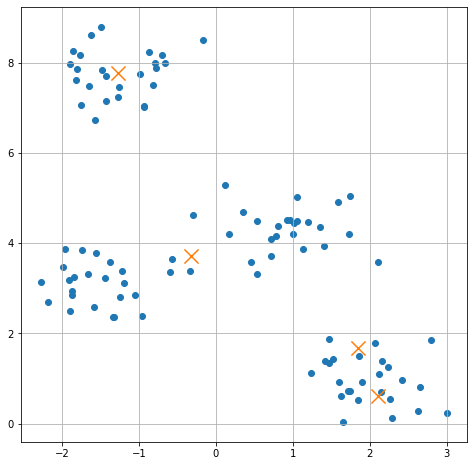

In [19]:
# この時の中心点を可視化

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', 
            s=200, edgecolors='r')
plt.grid()

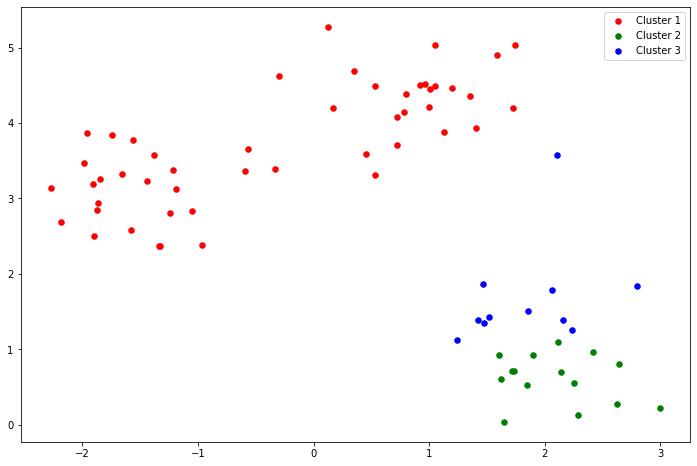

In [20]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

**class ScratchKMeansに実装してみる**

In [21]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init=1, max_iter=20, tol=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

        self.best_centroids = None
        self.best_cluster = None
        self.best_sse = None

        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        X_samples, X_features = X.shape # (n_samples, n_features)

        for _ in range(self.n_init):
            # 中心点の初期値を決める
            self.centroids = self.init_centroids(X, self.n_clusters)
                
            # 全てのデータ点を最も近い中心点に割り当てる配列を作っておく
            self.cluster = np.zeros(X_samples)
            
            # 新しい中心点を入れる配列を作っておく
            new_centroids = np.zeros((self.n_clusters, X_features))
            
            # 中心点までの距離を入れる行列を作っておく
            self.norms = np.zeros(X_samples * self.n_clusters)
            self.norms = self.norms.reshape(X.shape[0], self.n_clusters)
            
            # イテレーション分繰り返す
            for _ in range(self.max_iter):                
                for j in range(self.n_clusters):
                    # 中心点との距離を求める
                    self.norms[:, j] = np.linalg.norm(X - self.centroids[j], axis=1)
                    
                # 全てのデータ点を最も近い中心点のラベルに更新
                self.cluster = np.argsort(self.norms, axis=1)[:,0]

                # 中心点の移動
                new_centroids = self.compute_centroids(X)

                # 抜ける条件を設定（中心点と重心の許容誤差を超えたら）
                if np.sum(np.linalg.norm(new_centroids - self.centroids, axis=1)) <= self.tol:
                    break

                self.centroids = new_centroids.copy()

            # sseを計算
            sse = self.compute_sse(X)
            
            # 更新
            if self.best_sse == None or self.best_sse > sse:
                self.best_sse = sse
                self.best_centroids = self.centroids.copy()
                self.best_cluster = self.cluster.copy()
                
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("self.cluster : ", self.cluster, sep='\n')  
            print("self.best_sse : ", self.best_sse)
            print("self.best_centroids : ", self.best_centroids, sep='\n')
         
        
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        for i in range(self.n_clusters):
            self.norms[:, i] = np.linalg.norm(X - self.best_centroids[i], axis=1)
        
        # 一番近い中心点のクラスタ番号を返す
        return np.argsort(self.norms, axis=1)[:, 0]
    
    
    def init_centroids(self, X, k):
        """
        中心点の初期値を決める関数
        """
        m, n = X.shape # (n_samples, n_features)
        centroids = np.zeros((k, n)) # (k, n_features)
        idx = np.random.randint(0, m, k)

        for i in range(k):
            centroids[i,:] = X[idx[i],:]

        return centroids
    
    def compute_sse(self, X):
        """
        SSEを求める関数
        """
        m = X.shape[0]
        k = self.centroids.shape[0]
        sse = 0

        for i in range(m):
            dist_list = []
            for j in range(k):
                # 中心点毎に一番短い距離を保持
                dist_list.append(np.sum(((X[i,:] - self.centroids[j,:]) ** 2)))
                min_dist = min(dist_list)

            # 合計値を更新
            sse += np.sum(min_dist)

        return sse
   
    
    def compute_centroids(self, X):
        """
        中心点の移動関数
        """
        m, n = X.shape
        centroids = np.zeros((self.n_clusters, n))
        idx = self.cluster

        for i in range(self.n_clusters):
            # 中心点のラベルに該当するデータ点のインデックスを保存
            indices = np.where(idx == i)
            # 新しい中心点（重心）を求める
            centroids[i] = X[idx == i].mean(axis=0)

        return centroids

In [22]:
km_s01 = ScratchKMeans(n_clusters=4, n_init=1, max_iter=15, verbose=True)
km_s01.fit(X)

self.cluster : 
[1 0 1 1 1 1 3 0 1 0 0 0 0 0 0 2 2 3 3 2 1 0 3 2 1 3 3 1 2 2 2 0 2 2 3 1 0
 2 0 3 1 3 0 3 3 0 2 3 1 1 1 2 3 3 3 0 0 2 2 0 0 2 2 1 2 0 3 3 2 1 0 2 1 0
 1 1 3 3 2 2 2 0 3 1 2 3 2 2 1 1 1 3 1 3 3 0 0 3 0 1]
self.best_sse :  48.633783207064035
self.best_centroids : 
[[-1.26811733  7.76378266]
 [ 0.92578447  4.32475792]
 [ 1.99186903  0.96561071]
 [-1.47935679  3.11716896]]


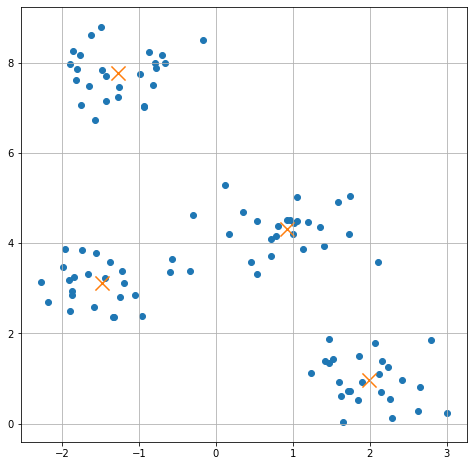

In [23]:
# この時の中心点を可視化

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.scatter(km_s01.best_centroids[:, 0], km_s01.best_centroids[:, 1], marker='x', 
            s=200, edgecolors='r')
plt.grid()

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。

In [24]:
km_s05 = ScratchKMeans(n_clusters=4, n_init=5, max_iter=15, verbose=True)
km_s05.fit(X)

self.cluster : 
[2 0 2 2 2 2 1 0 2 0 0 0 0 0 0 3 3 1 1 3 2 0 1 3 2 1 1 2 3 3 3 0 3 3 1 2 0
 3 0 1 2 1 0 1 1 0 3 1 2 2 2 3 1 1 1 0 0 3 3 0 0 3 3 2 3 0 1 1 3 2 0 3 2 0
 2 2 1 1 3 3 3 0 1 2 3 1 3 3 2 2 2 1 2 1 1 0 0 1 0 2]
self.best_sse :  48.633783207064035
self.best_centroids : 
[[ 1.99186903  0.96561071]
 [-1.47935679  3.11716896]
 [ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]]


<ipython-input-21-91bc3d821de1>:145: RuntimeWarning: Mean of empty slice.
  centroids[i] = X[idx == i].mean(axis=0)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


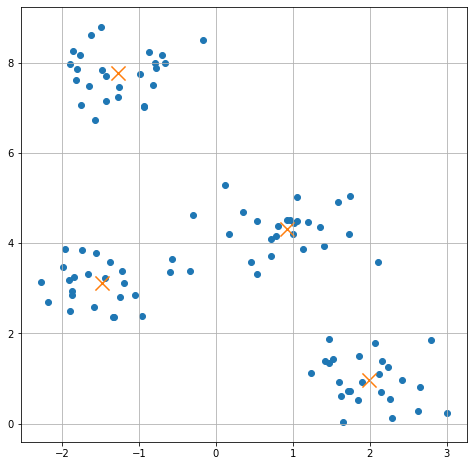

In [25]:
# この時の中心点を可視化

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.scatter(km_s05.best_centroids[:, 0], km_s05.best_centroids[:, 1], marker='x', 
            s=200, edgecolors='r')
plt.grid()

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

In [26]:
cluster_idx = km_s01.predict(X)
cluster_idx

array([1, 0, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 2, 1, 0,
       3, 2, 1, 3, 3, 1, 2, 2, 2, 0, 2, 2, 3, 1, 0, 2, 0, 3, 1, 3, 0, 3,
       3, 0, 2, 3, 1, 1, 1, 2, 3, 3, 3, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0,
       3, 3, 2, 1, 0, 2, 1, 0, 1, 1, 3, 3, 2, 2, 2, 0, 3, 1, 2, 3, 2, 2,
       1, 1, 1, 3, 1, 3, 3, 0, 0, 3, 0, 1])

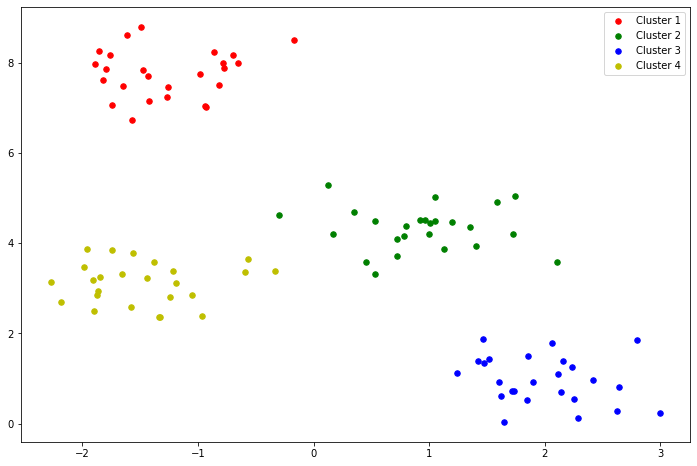

In [27]:
cluster1 = X[np.where(cluster_idx == 0)[0],:]
cluster2 = X[np.where(cluster_idx == 1)[0],:]
cluster3 = X[np.where(cluster_idx == 2)[0],:]
cluster4 = X[np.where(cluster_idx == 3)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='y', label='Cluster 4')
ax.legend()
plt.show()

In [28]:
cluster_idx05 = km_s05.predict(X)
cluster_idx05

array([2, 3, 2, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1, 0, 2, 3,
       1, 0, 2, 1, 1, 2, 0, 0, 0, 3, 0, 0, 1, 2, 3, 0, 3, 1, 2, 1, 3, 1,
       1, 3, 0, 1, 2, 2, 2, 0, 1, 1, 1, 3, 3, 0, 0, 3, 3, 0, 0, 2, 0, 3,
       1, 1, 0, 2, 3, 0, 2, 3, 2, 2, 1, 1, 0, 0, 0, 3, 1, 2, 0, 1, 0, 0,
       2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 3, 2])

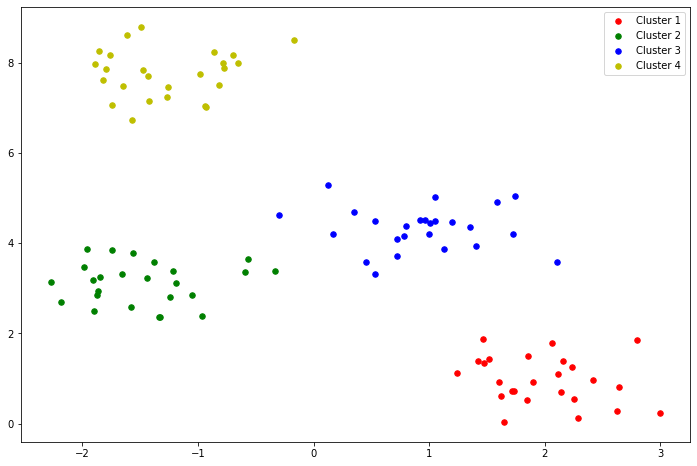

In [29]:
cluster1 = X[np.where(cluster_idx05 == 0)[0],:]
cluster2 = X[np.where(cluster_idx05 == 1)[0],:]
cluster3 = X[np.where(cluster_idx05 == 2)[0],:]
cluster4 = X[np.where(cluster_idx05 == 3)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='y', label='Cluster 4')
ax.legend()
plt.show()

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 k は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 k を検討するためのコードを作成してください。

SSEを縦軸、クラスタ数 k を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [30]:
sse_array = np.zeros(10)
for i in range(10):
    km_s_el = ScratchKMeans(n_clusters=i+1, n_init=5, max_iter=15, verbose=False)
    km_s_el.fit(X)
    sse_array[i] = km_s_el.best_sse

<ipython-input-21-91bc3d821de1>:145: RuntimeWarning: Mean of empty slice.
  centroids[i] = X[idx == i].mean(axis=0)


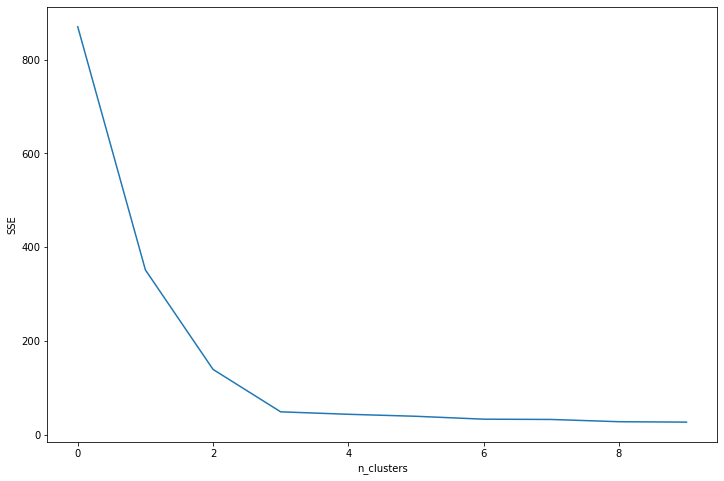

In [31]:
# 折れ線グラフの出力

plt.figure(figsize=(12, 8))
x = np.array(range(10))
y = sse_array
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.plot(x, y)
plt.show()

【問題9】（アドバンス課題）シルエット図

## 2.クラスタ分析

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


[UCI Machine Learning Repository: Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り除き、金額のデータでK-meansを利用します。

### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [32]:
# Wholesale customers dataを読み込む
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [33]:
# RegionとChannel列を取り除く
data = df.iloc[:, (df.columns != "Channel") & (df.columns != "Region")]
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [34]:
# 主成分分析の準備として対数変換を行う

data = np.log(data)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [35]:
# 《PCAのサンプルコード》
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
# data_pca

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


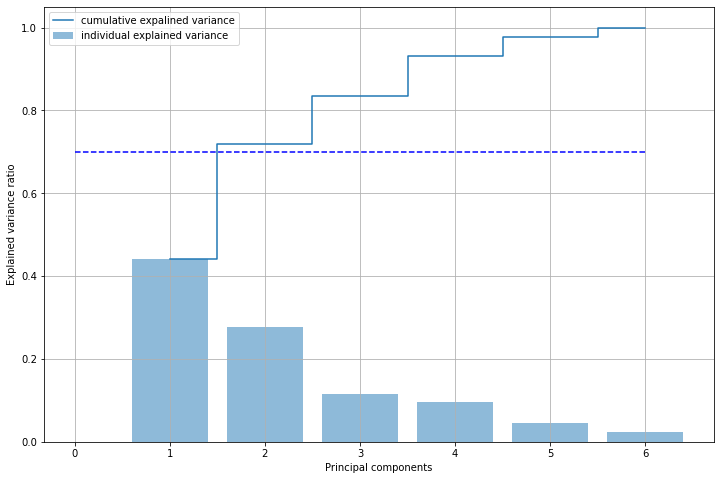

In [36]:
# 《PCAの分散説明率を表示するコードサンプル》
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 k を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [37]:
sse_array_data = np.zeros(10)
for i in range(10):
    km_s_el_data = ScratchKMeans(n_clusters=i+1, n_init=5, max_iter=15, verbose=False)
    km_s_el_data.fit(data_pca)
    sse_array_data[i] = km_s_el_data.best_sse

<ipython-input-21-91bc3d821de1>:145: RuntimeWarning: Mean of empty slice.
  centroids[i] = X[idx == i].mean(axis=0)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


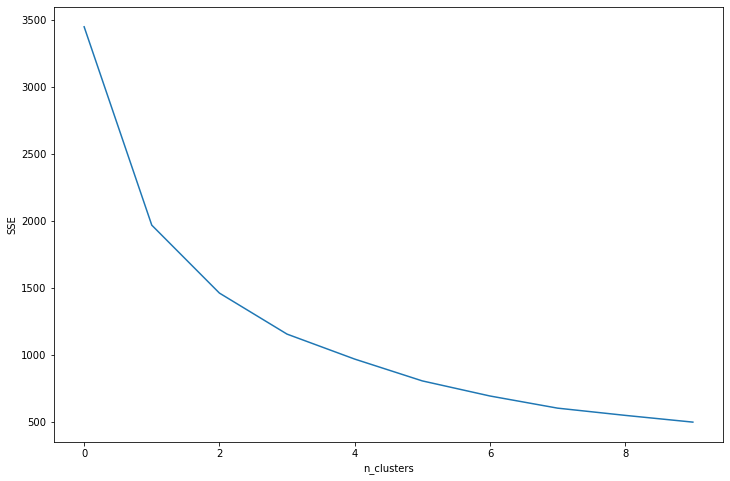

In [38]:
# 折れ線グラフの出力

plt.figure(figsize=(12, 8))
x = np.array(range(10))
y = sse_array_data
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.plot(x, y)
plt.show()

**最適だと思われるクラスタ数：2**

**⇒エルボー図が一番急降下となっているため。**

In [39]:
km_s_data02 = ScratchKMeans(n_clusters=2, n_init=5, max_iter=15, verbose=False)
km_s_data02.fit(data_pca)

In [40]:
y_km = km_s_data02.predict(data_pca)
y_km

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

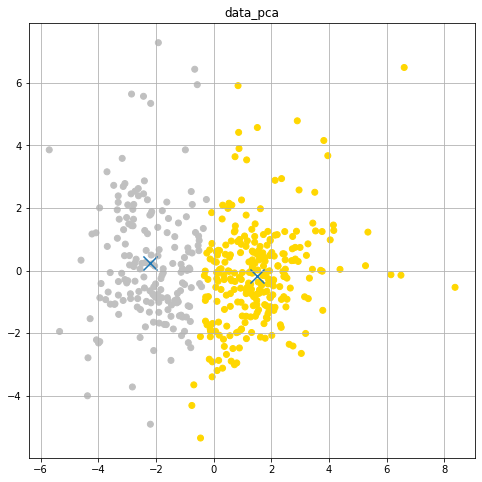

In [41]:
# 可視化

plt.figure(figsize=(8, 8))
colors = ['gold','silver']
cmap = ListedColormap(colors)
plt.title('data_pca')

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_km, cmap=cmap, marker='o')
centroids = km_s_data02.best_centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', 
            s=200, edgecolors='r')
plt.grid()

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

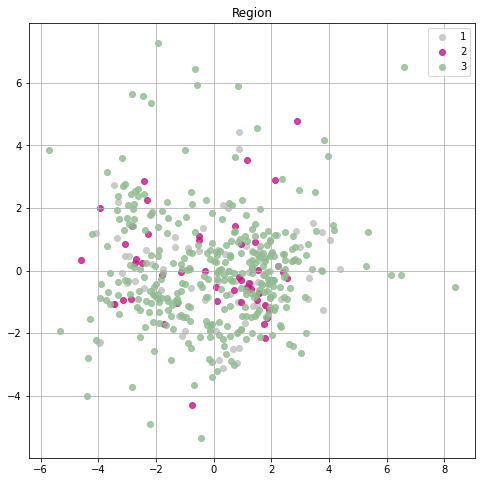

In [42]:
# Regionグループの可視化

colors = ['gold','silver','mediumvioletred','darkseagreen']
fig = plt.figure(figsize =(8, 8))
ax = fig.add_subplot(1,1,1)
for i in np.unique(df["Region"].values):
    idx = np.where(df["Region"].values == i)
    ax.scatter(data_pca[idx, 0], data_pca[idx, 1], alpha=0.8, c=colors[i], label=i)

ax.legend()
ax.set_title("Region")
plt.grid()

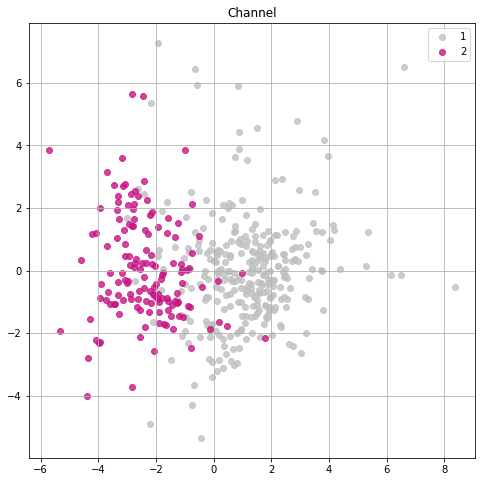

In [43]:
# Channelグループの可視化

colors = ['gold','silver','mediumvioletred','darkseagreen']
fig = plt.figure(figsize =(8, 8))
ax = fig.add_subplot(1,1,1)
for i in np.unique(df["Channel"].values):
    idx = np.where(df["Channel"].values == i)
    ax.scatter(data_pca[idx, 0], data_pca[idx, 1], alpha=0.8, c=colors[i], label=i)

ax.legend()
ax.set_title("Channel")
plt.grid()

**考察：Channelグループのグラフと次元削減後のK-meanによるクラスタ分析のグラフとはかなり似た結果となり、Channelによる分類は統計的にも意味があると言えよう。一方、Regionでははっきりとしたクラスタ分類ができず、Regionによる分類は統計的に意味があるとは言えない。**

## 【問題12】卸売業者にとって有益な情報

**まずはデータの中身について見てみよう(Data Setの情報より)。**
- 1）FRESH  ：生鮮品の年間支出（通貨単位）
- 2）MILK   ：乳製品の年間支出（通貨単位）
- 3）GROCERY：グロサリー部門の年間支出（通貨単位）
- 4）FROZEN ：冷凍品の年間支出（通貨単位）
- 5）DETERGENTS_PAPER：洗剤、紙製品の年間支出（通貨単位）
- 6）DELICATESSEN：デリカテッセン(惣菜)の年間支出（通貨単位）
- 7）CHANNEL：販売チャネル - Horeca（ホテル/レストラン/カフェ）またはその他の販売チャネル
- 8）REGION ：消費地域 - リスボン、ポルト、その他

In [44]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**卸売額: Fresh > Grocery > Milk > Frozen > Detergents_Paper > Delicassen**

**小口から大口まで、多様な顧客を持っている**

In [45]:
df.groupby(['Channel']).mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


In [46]:
# 取引先の数
df.groupby(["Channel","Region"]).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105

In [47]:
df['Total'] = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)
df[['Region','Total']].groupby(['Region']).count()

,Total
Region,
1,77
2,47
3,316


In [48]:
df[['Channel','Total']].groupby(['Channel']).count()

,Total
Channel,
1,298
2,142


In [49]:
# 取引額平均
df.groupby(["Channel","Region"]).mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen         Total  
Channel Region                                               
1       1             950.525424  1197.152542  26073.593220  
        2             482.714286  1105.892857  25683.928571  
        3             786.682464  1518.284360  27213.635071  
2       1            8225.277778  1871.944444  47137.277778  
        2            8410.263158  1239.000000  43996.736842  
        3            6899.238095  1826.209524  47004.971429

In [50]:
# 取引額合計
df.drop('Region',axis=1).groupby(['Channel']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Channel,,,,,,,
1,4015717,1028614,1180717,1116979,235587,421955,7999569
2,1264414,1521743,2317845,234671,1032270,248988,6619931


**Channelの中身**
- Channel 1: Hoterica(ホテル/レストラン/カフェ)
- Channel 2: Retail(小売チャネル（名目）)

**Regionの中身**
- Region 1: リスボン
- Region 2: ポルト
- Region 3: その他

**考察**
- Hotericaの生鮮品と冷凍品の取引額はRetailのと比べて大きく、一方、乳製品、グロサリーや洗剤、紙製品のホテル/レストラン/カフェの取引額が小さい。ホテル/レストラン/カフェ関連の顧客なので、その通りである印象。
- 逆に、小売チャネルの冷凍品の取引額が比較的に少ないのは、大きい食品スーパーではなく、小さい小売店が多いかと推測する。規模の比較的に大きい食品スーパーや総合小売店、ディスカウントストアなどにも開拓する余地がありそう。
- また、Region3（その他）の小売チャネルの生鮮品がRegion1（リスボン）の2倍に近い平均取引額があり、Region2（ポルト）のよりも約35％多く取引されている。なぜその違いがあるか突き詰めていくと、Region3（その他）の成功要因は他のRegionにも水平展開できるかもしれない。
- Horecaは、Retailに対して倍近い取引があるにもかかわらず、卸売額はそれほど大きな差がないのも大口顧客へのアプローチをさらに強化して試みるべきだと言えよう。